In [ ]:
#Importowanie potrzebny paczek
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

diabetes = datasets.load_diabetes()

## opracować wizualizację dla zbioru ‘boston’,

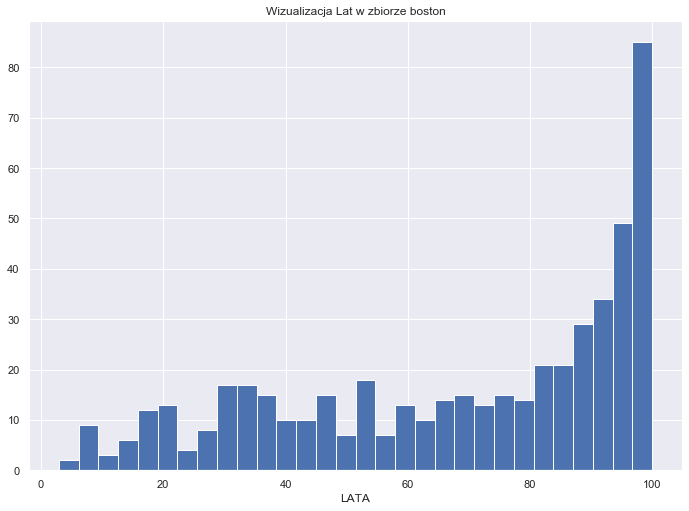

In [121]:
#Załaduj house-prices dataset i utwórz histogram na podstawie danych z kolumny AGE
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['AGE'], bins=30)
plt.xlabel("LATA")
plt.title('Wizualizacja Lat w zbiorze boston')
plt.show()

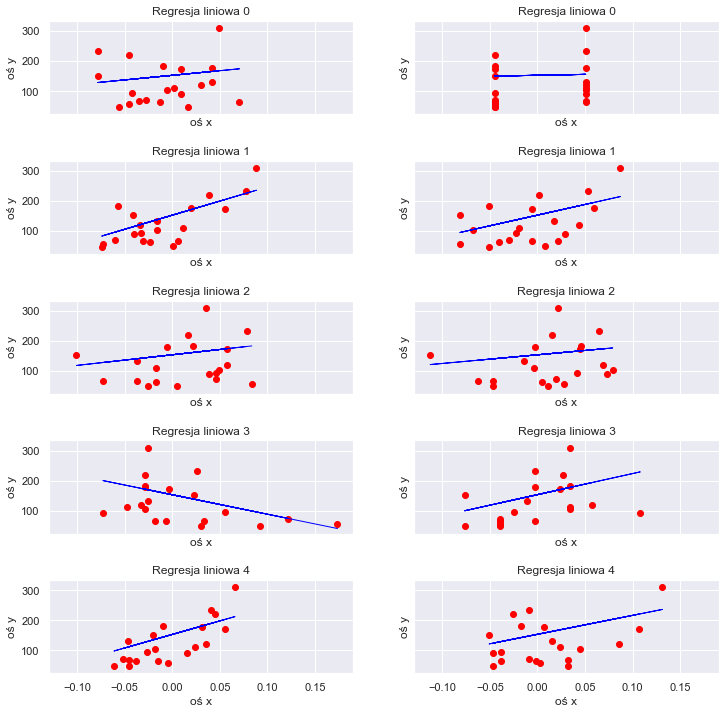

In [125]:
#Utwórz kilka subplotów na który przedstawione zostaną wykresy
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
f.subplots_adjust(hspace=.5) # Dodaj przestrzeń między wykresami
 
for i in range(0,5):
    for j in range(0,2):
        # Użyj tylko jednego featue
        diabetes_X = diabetes.data[:, np.newaxis, i*2+j]
        
        # Rozdziel dane na zbiory do treningu i do testów
        diabetes_X_train = diabetes_X[:-20]
        diabetes_X_test = diabetes_X[-20:]
        
        # Rozdziel dane na zbiory do treningu i do testów
        diabetes_y_train = diabetes.target[:-20]
        diabetes_y_test = diabetes.target[-20:]
        
        # Utwórz obiekt potrzebny do utworzenie regresji liniowej
        regr = linear_model.LinearRegression()
        
        # Trenuj model korzystanjąc z zestawów do trenowania
        regr.fit(diabetes_X_train, diabetes_y_train)
        

        
        # Na obecnym indeksie subplotu narysuj wykres
        axarr[i,j].scatter(diabetes_X_test, diabetes_y_test,  color='red')
        axarr[i,j].plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=1)
        axarr[i,j].set(xlabel = 'oś x') #ustaw x label czyli to co na dole
        axarr[i,j].set(ylabel = 'oś y')  #ustaw x label czyli to co po prawej
        axarr[i,j].set_title("Regresja liniowa " + str(i)) #ustaw tytuł osi
        
plt.show()

## porównać modele regresji liniowej dla zbioru ‘diabetes’ [niekonieczne]

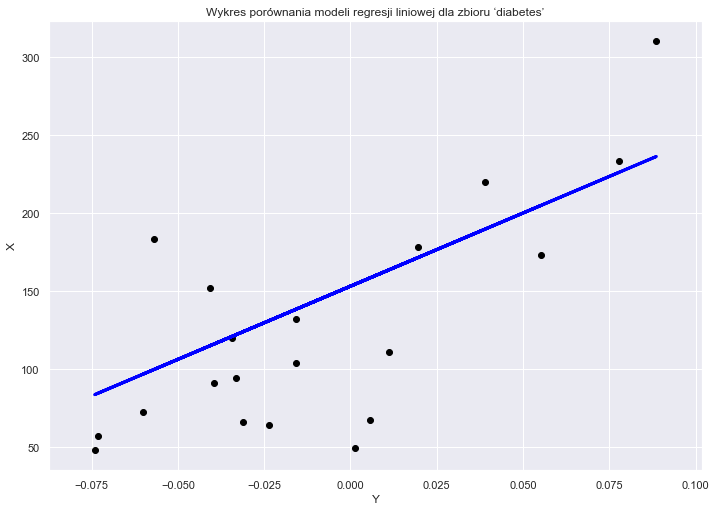

In [117]:
#Poberz dane z "diabetes" dodając nową oś 
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Rozdziel dane na zbiory do treningu i do testów
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Rozdziel dane na zbiory do treningu i do testów
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Utwórz obiekt potrzebny do utworzenie regresji liniowej
regr = linear_model.LinearRegression()

# Trenuj model korzystanjąc z zestawów do trenowania
regr.fit(diabetes_X_train, diabetes_y_train)

#  "Przewidzenia" danych korzystając z zestawu treningowego 
diabetes_y_pred = regr.predict(diabetes_X_test)



# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.ylabel('X')
plt.xlabel('Y')
plt.title('Wykres porównania modeli regresji liniowej dla zbioru ‘diabetes’')

plt.show()

# opracować przykład z linka nr 2 z wykorzystaniem bibliotek Python’a,

In [127]:
import math
dane = pd.read_csv('DaneMalzenstw.csv') # Z linku 2 pobrałem tabele i wartości zapisałem je w csv żeby łatwiej było mi operować na danych
xData = dane['x']  # pobieram wartości z kolumny x == ludnośc
yData = dane['y'] # pobieram wartości z kolumny y == małżeństwa

## Pierwszy sposób zadania

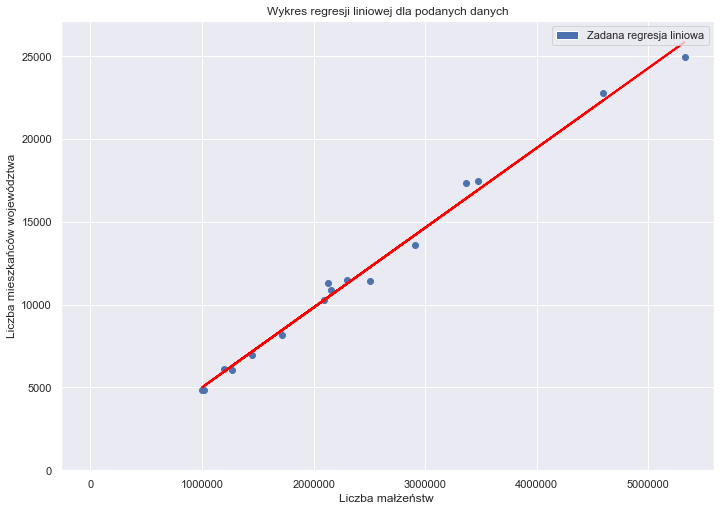

In [132]:
#Tutaj na podsatwie kroków po kolei wykonuje obliczenia

#obliczam średnią arytmetyczną pierwszej i drugiej kolmny
XDataMean = xData.mean()
YDataMean = yData.mean()

#następnie wykonuj obliczenia dla x−x¯¯¯ oraz 	y−y¯¯¯ czyli od każdego x i y odejmuję średnią i zapisuje to w tablicy
xMmean = list()
yMmean = list()

for i in xData:
    xMmean.append(i - XDataMean)
    
for y in yData:
    yMmean.append(y - YDataMean) 

#Po obliczeniu średniej przechodzę do obliczenia (x−x¯¯¯)∗(y−y¯¯¯) korzystam z  zipa żeby za jednym razem operawać na 2 listach
substractData = list()

for xD, yD in zip(xMmean, yMmean):
    substractData.append(xD * yD)

#Tutaj dokonuje obliczeń dla (x−x¯¯¯)2
xSubstractToPower = list()
for i in xMmean:
    xSubstractToPower.append(math.pow(i,2))
    
#NAstępnie obliczam a poprzez podzielnie sumy z pierwszej i drugiej listy, a potem obliczam b ze wzoru b=y¯¯¯−ax¯¯¯
sumFirst = (sum(substractData))
sumSecond = (sum(xSubstractToPower))

a = sumFirst / sumSecond
b = YDataMean - a * XDataMean

#Następnie tworzę potrzebne x do narysowania korzystając z funkcji f(x) = ax + b
xToDraw = list()
for i in xData:
    xToDraw.append((a * i) + b)

plt.plot(xData, yData,'bo')
plt.plot(xData, xToDraw, color='red', linewidth=2)
plt.hist(xToDraw,label='Zadana regresja liniowa')
plt.ylabel('Liczba mieszkańców województwa')
plt.xlabel('Liczba małżeństw ')
plt.title('Wykres regresji liniowej dla podanych danych')
plt.legend(loc="upper right")
plt.show()

## Drugi sposób zadania

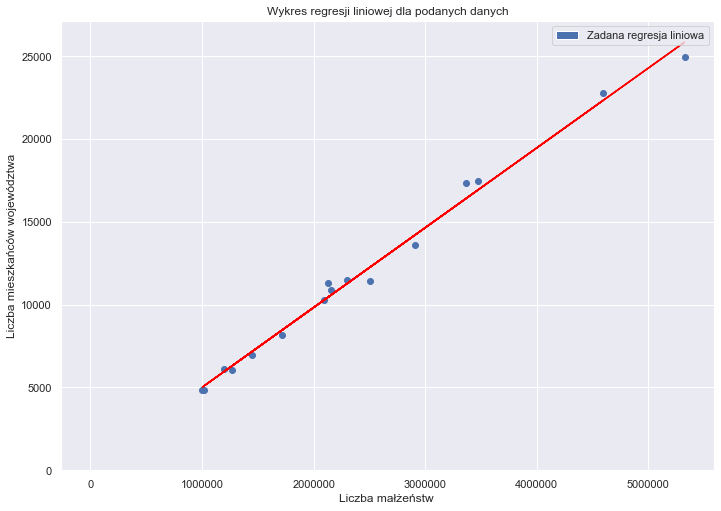

In [133]:
#Poprzedni sposób to było wykorzystanie algorytmu podanej na stronie Tutaj wykorzystuje to samo, ale już wykorzystując 
#obiekt LinearRegression

#Dane z 2 kolumn
X = pd.DataFrame(xData, dtype=float)
Y = pd.DataFrame(yData, dtype=float)
linear_regressor = LinearRegression() 

#Dopasowuje model liniowy na podstawie danych
linear_regressor.fit(X, Y)

# "Przewidzenia" danych korzystając z zestawu treningowego 
Y_pred = linear_regressor.predict(X)

#Narysowanie punktów z csv oraz regresji liniowej kolorem czerwonym
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.hist(Y_pred,label='Zadana regresja liniowa')
plt.ylabel('Liczba mieszkańców województwa')
plt.xlabel('Liczba małżeństw ')
plt.title('Wykres regresji liniowej dla podanych danych')
plt.legend(loc="upper right")
plt.show()

# opracować przykład z linka nr 4 z wykorzystaniem bibliotek Python’a
[Tutaj nie ma legendy ponieważ dodanie jej psuje wykres]

In [ ]:
#Dokładnie taki sam algorytm jak wcześniej.
dane = pd.read_csv('DochodyIWydatki.csv')
dochody = dane['Dochody']
wydatki = dane['Wydatki']

## Pierwszy sposób zadania 

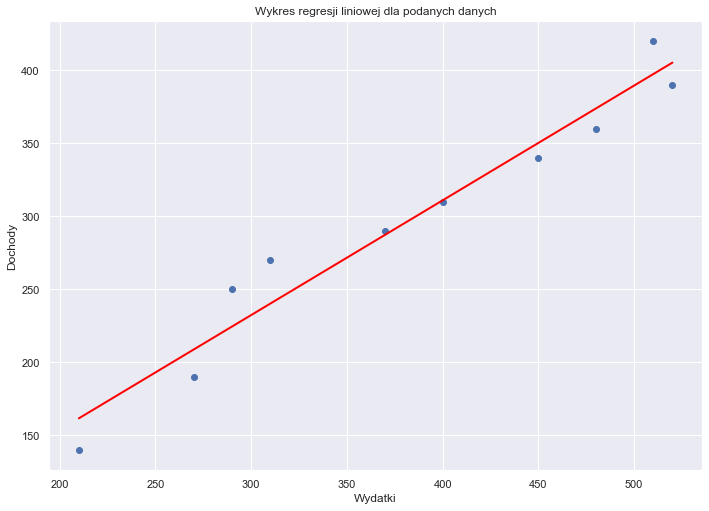

In [135]:
#plt.plot(xData,yData,'bo')
XDataMean = dochody.mean()
YDataMean = wydatki.mean()

xMmean = list()
yMmean = list()

for i in dochody:
    xMmean.append(i - XDataMean)
    
for y in wydatki:
    yMmean.append(y - YDataMean) 

substractData = list()

for xD, yD in zip(xMmean, yMmean):
    substractData.append(xD * yD)

xSubstractToPower = list()
for i in xMmean:
    xSubstractToPower.append(math.pow(i,2))
    
sumFirst = (sum(substractData))
sumSecond = (sum(xSubstractToPower))

a = sumFirst / sumSecond
b = YDataMean - a * XDataMean
xToDraw = list()
for i in dochody:
    xToDraw.append((a * i) + b)

plt.plot(dochody, wydatki,'bo')
plt.plot(dochody, xToDraw, color='red', linewidth=2)
plt.ylabel('Dochody')
plt.xlabel('Wydatki')
plt.title('Wykres regresji liniowej dla podanych danych')
plt.show()

## Drugi sposób zadania 

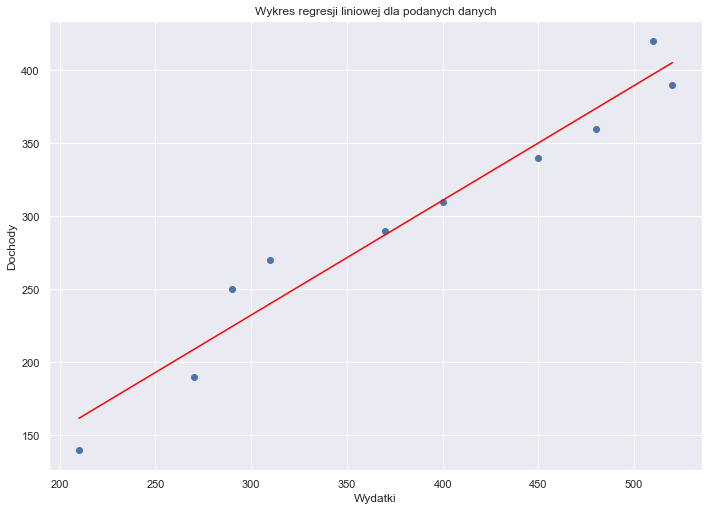

In [136]:
X = pd.DataFrame(dochody, dtype=float)
Y = pd.DataFrame(wydatki, dtype=float)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel('Dochody')
plt.xlabel('Wydatki')
plt.title('Wykres regresji liniowej dla podanych danych')
plt.show()

# wygenerować zbiór 100 punktów oraz obliczyć i wyświetlić dla nich prostą regresji (z wykorzystaniem bibliotek Python’a), dla wyższej oceny należy to zzadanie zrealizować wg kolejnych kroków z linka nr 5,
[Ponieważ link 5 ma taki sam opis przeprowadzenia algorytmu jak link 2 tak naprawdę to zadanie zrobiłem już w  zadaniu więc opis znajduję się też tam]

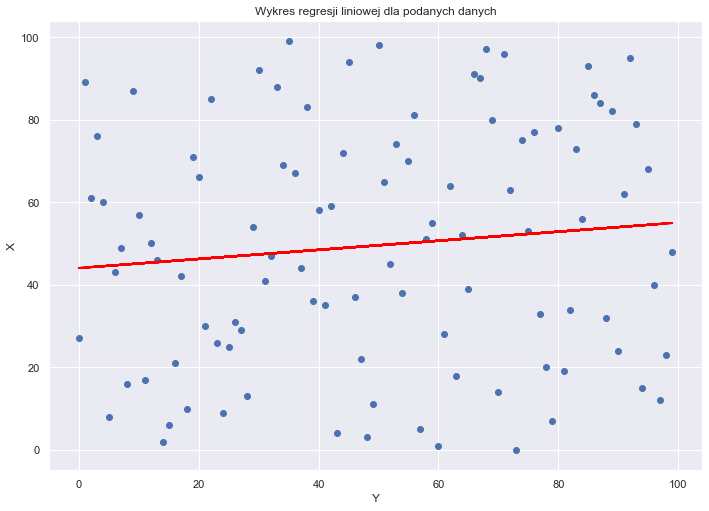

In [137]:
import random

xData = random.sample(range(100), 100)
yData = random.sample(range(100), 100)

#plt.plot(xData,yData,'bo')
XDataMean = np.mean(xData)
YDataMean = np.mean(yData)

xMmean = list()
yMmean = list()

for i in xData:
    xMmean.append(i - XDataMean)
    
for y in yData:
    yMmean.append(y - YDataMean) 

substractData = list()

for xD, yD in zip(xMmean, yMmean):
    substractData.append(xD * yD)

xSubstractToPower = list()
for i in xMmean:
    xSubstractToPower.append(math.pow(i,2))
    
sumFirst = (sum(substractData))
sumSecond = (sum(xSubstractToPower))

a = sumFirst / sumSecond
b = YDataMean - a * XDataMean
xToDraw = list()
for i in xData:
    xToDraw.append((a * i) + b)

plt.plot(xData, yData,'bo')
plt.plot(xData, xToDraw, color='red', linewidth=2)
plt.ylabel('X')
plt.xlabel('Y')
plt.title('Wykres regresji liniowej dla podanych danych')
plt.show()